# PA 1: Exploratory Analysis over Covid19 Dataset

## Student Details

Student Name and ID: Chandra Shekhar Kasturi  1001825454


Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!
Do not make any changes in the dataset file and do not rename any '.csv' files.
Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>.
Do not to forget to cite any external sources used by you.

* [-5 points] if this note/rule is not abided.


## Assignment Details

In this assignment, you will conduct a guided exploration over covid 19 dataset. You will learn and use some of the most common exploration/aggregation/descriptive operations. This should also help you learn most of the key functionalities in Pandas.

You will also learn how to use visualization libraries to identify patterns in data that will help in your further data analysis. You will also explore most popular chart types and how to use different libraries and styles to make your visualizations more attractive.

## Dataset Details

In this assignment, you will work on Covid 19 dataset. Specifically, you will work on covid.csv attached file with this project. The file covid.csv contains 35,156 rows and 10 columns. This dataset begins 01/22/2020, and runs upto 7/27/2020. It includes day to day country wise no. of cases which has County/State/Province level data. The columns of the data-set are:

- Date - The day on which cases have been reported / recorded.
- Country/Region - The country where these cases have been recorded.
- Confirmed	Deaths - The no. of deaths
- Recovered	- The no. of recovered cases.
- Active - The no. of active cases.
- New cases	- The no. of new cases.
- New deaths - The no. of new deaths.	
- New recovered - The no. of new recovered cases.
- WHO Region - WHO operated regions.


## Required Python Packages
You will use the packages imported below in this assignment. 
Do NOT import any new packages without confirming with the TA. 

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Dataset
The Python code below reads the Federal Emergencies and Disasters dataset into a Pandas data frame with the name df_data. 
For this code to work, the file 'database.csv' must be in the same folder as this file.

In [2]:
#2.5 points for both questions below.

#read the csv file into a Pandas data frame
df_data = pd.read_csv('covid.csv',encoding='latin1')
print (">>Task a: The csv file into a Pandas data frame: \n\n",df_data  )

#return the last 5 rows of the dataset
print (">>Task b: The last 5 rows of the dataset are: \n\n",df_data.tail() )

>>Task a: The csv file into a Pandas data frame: 

             Date      Country/Region  Confirmed  Deaths  Recovered  Active  \
0      1/22/2020         Afghanistan          0       0          0       0   
1      1/22/2020             Albania          0       0          0       0   
2      1/22/2020             Algeria          0       0          0       0   
3      1/22/2020             Andorra          0       0          0       0   
4      1/22/2020              Angola          0       0          0       0   
...          ...                 ...        ...     ...        ...     ...   
35151  7/27/2020  West Bank and Gaza      10621      78       3752    6791   
35152  7/27/2020      Western Sahara         10       1          8       1   
35153  7/27/2020               Yemen       1691     483        833     375   
35154  7/27/2020              Zambia       4552     140       2815    1597   
35155  7/27/2020            Zimbabwe       2704      36        542    2126   

       New 

# Task 1: Statistical Exploratory Data Analysis
Let us start with getting know the dataset. Your first task will be to get some basic information by using Pandas features.
For each task below, look for a Pandas function to do the task.
Replace None in each task with your code.

In [3]:
# 2.5 points
#Task 1-a: Print the details of the data frame (information such as number of rows,columns, name of columns, etc)

print (">>Task 1-a: Details of data frame are: \n\n")
df_data.info()

>>Task 1-a: Details of data frame are: 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [4]:
#2.5 points
#Task 1-b: Find the number of rows and columns in the data frame.
num_rows = df_data.shape[0]
num_cols = df_data.shape[1]
print ("\n\n>>Task 1-b: Number of rows:%s and number of columns:%s \n" % (num_rows, num_cols)) 



>>Task 1-b: Number of rows:35156 and number of columns:10 



In [5]:
#7.5 points
#Task 1-c: Print the total cases confirmed, deaths, and recovered cases of each country with the given dataset.
#The below variable holds data for all the unique countries, and their total - confirmed, deaths, and recovered cases.

total_confirmed_deaths_recovered=df_data.groupby('Country/Region')['Confirmed','Deaths','Recovered'].sum()

print ("\n\n>>Task 1-c: Total cases confirmed, deaths, and recovered for each country are  \n",total_confirmed_deaths_recovered)



>>Task 1-c: Total cases confirmed, deaths, and recovered for each country are  
                 Confirmed  Deaths  Recovered
Country/Region                              
Afghanistan       1936390   49098     798240
Albania            196702    5708     118877
Algeria           1179755   77972     755897
Andorra             94404    5423      69074
Angola              22662    1078       6573
...                   ...     ...        ...
Western Sahara        901      63        648
Yemen               67180   17707      23779
Zambia             129421    2643      83611
Zimbabwe            50794     881      12207
taiwan              55593     840      42184

[187 rows x 3 columns]


<ipython-input-5-6c4026f8a0bf>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_confirmed_deaths_recovered=df_data.groupby('Country/Region')['Confirmed','Deaths','Recovered'].sum()


In [6]:
# 5 points for both questions below,

#Task 1-d-i: Print top 10 worst affected countries with confirmed cases.
top_confirmed_ten_countries  =df_data.groupby('Country/Region')['Confirmed'].sum().to_frame('Confirmed_count').reset_index().sort_values(['Confirmed_count'],ascending=[False]).head(10)
total_confirmed_deaths_recovered.nlargest(10,'Confirmed')
print("\nTop 10 worst affected countries with confirmed cases.\n")
print ("\n\n >>Task 1-d: \n", top_confirmed_ten_countries)

#Task 1-d-ii: Print top 5 worst affected countries with death cases.
top_death_five_countries  = df_data.groupby('Country/Region')['Deaths'].sum().to_frame('Death_count').reset_index().sort_values(['Death_count'],ascending=[False]).head(5)

print("\nTop 5 worst affected countries with death cases.\n")
print ("\n\n >>Task 1-d: \n", top_death_five_countries)


Top 10 worst affected countries with confirmed cases.



 >>Task 1-d: 
      Country/Region  Confirmed_count
172              US        224345948
23           Brazil         89524967
138          Russia         45408411
79            India         40883464
157           Spain         27404045
176  United Kingdom         26748587
85            Italy         26745145
61           France         21210926
65          Germany         21059152
81             Iran         19339267

Top 5 worst affected countries with death cases.



 >>Task 1-d: 
      Country/Region  Death_count
172              US     11011411
176  United Kingdom      3997775
23           Brazil      3938034
85            Italy      3707717
61           France      3048524


# Task 2: Aggregation & Filtering & Rank
In this task, we will perform some very high level aggregation and filtering operations. 
Then, we will apply ranking on the results for some tasks. 
Pandas has a convenient and powerful syntax for aggregation, filtering, and ranking. 
DO NOT write a for loop. Pandas has built-in functions for all tasks. 

In [7]:
# 8 points
#Task 2-a: Find out the countries that has had more than a total of 2 hundred thousand confirmed cases.
total_count=df_data.groupby('Country/Region')['Confirmed'].sum().to_frame('Confirmed_count').reset_index().sort_values(['Confirmed_count'],ascending=[False])
tc=total_count[(total_count.Confirmed_count>200000)]
confirmed_greater_than_200K = tc['Country/Region'].unique()
print (">>Task 2-a:  The countries that has had more than a total of 2 hundred thousand confirmed cases are: \n%s" % (confirmed_greater_than_200K))

# 8 points
#Task 2-b: Find out the total number of confirmed, recovered, and death cases for each WHO region.
total_cases_whoregion = df_data.groupby('WHO Region')['Confirmed','Deaths','Recovered'].sum()
print ("\n\n>>Task 2-b: The total number of confirmed, recovered, and death cases for each WHO region are: \n%s" % (total_cases_whoregion))

# 7 points
#Task 2-c: Find out the top 5 poorly performing countries, in the order of confirmed, deaths, and recovered cases.
top5_poorlyperforming=total_confirmed_deaths_recovered.nlargest(5,['Confirmed','Deaths','Recovered'])
print ("\n\n>>Task 2-c: The top 5 poorly performing countries, in the order of confirmed, deaths, and recovered cases.s are: \n%s" % (top5_poorlyperforming))

# 7 points
#Task 2-d: Find out the top 5 poorly performing WHO regions, in the order of confirmed, deaths, and recovered cases.
top5_disasters=total_cases_whoregion.nlargest(5,['Confirmed','Deaths','Recovered'])
print ("\n\n>>Task 2-d: The top 5 poorly performing WHO regions, in the order of confirmed, deaths, and recovered cases are: \n%s" % (top5_disasters))




>>Task 2-a:  The countries that has had more than a total of 2 hundred thousand confirmed cases are: 
['US' 'Brazil' 'Russia' 'India' 'Spain' 'United Kingdom' 'Italy' 'France'
 'Germany' 'Iran' 'Peru' 'Turkey' 'Chile' 'Mexico' 'China' 'Pakistan'
 'Saudi Arabia' 'South Africa' 'Canada' 'Bangladesh' 'Colombia' 'Qatar'
 'Belgium' 'Netherlands' 'Sweden' 'Ecuador' 'Argentina' 'Belarus' 'Egypt'
 'Indonesia' 'Portugal' 'Switzerland' 'United Arab Emirates' 'Singapore'
 'Ukraine' 'Kuwait' 'Iraq' 'Philippines' 'Poland' 'Israel' 'Ireland'
 'Oman' 'Dominican Republic' 'Kazakhstan' 'Panama' 'Romania' 'Bolivia'
 'Austria' 'Japan' 'Afghanistan' 'Bahrain' 'South Korea' 'Nigeria'
 'Armenia' 'Serbia' 'Denmark' 'Guatemala' 'Ghana' 'Honduras' 'Algeria'
 'Moldova' 'Czechia' 'Azerbaijan' 'Norway' 'Morocco' 'Australia'
 'Malaysia' 'Cameroon' 'Finland' 'Nepal' 'Uzbekistan' 'Cote dIvoire'
 'Kyrgyzstan' 'Sudan' 'Luxembourg' 'Senegal' 'Kenya' 'El Salvador'
 'North Macedonia' 'Congo (Kinshasa)' 'Venezuela' 'Bulga

<ipython-input-7-5811ac980143>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_cases_whoregion = df_data.groupby('WHO Region')['Confirmed','Deaths','Recovered'].sum()





>>Task 2-c: The top 5 poorly performing countries, in the order of confirmed, deaths, and recovered cases.s are: 
                Confirmed    Deaths  Recovered
Country/Region                                
US              224345948  11011411   56353416
Brazil           89524967   3938034   54492873
Russia           45408411    619385   25120448
India            40883464   1111831   23783720
Spain            27404045   3033030   15093583


>>Task 2-d: The top 5 poorly performing WHO regions, in the order of confirmed, deaths, and recovered cases are: 
                       Confirmed    Deaths  Recovered
WHO Region                                           
Americas               402261194  19359292  157069444
Europe                 248879793  19271040  123202075
Eastern Mediterranean   74082892   1924029   48050703
South-East Asia         55118365   1458134   30030327
Western Pacific         26374411    932430   18861950


# Task 3: Visualization
In this task, you will perform a number of visualization tasks to get some intuition about the data. Visualization is a key component of exploration. You can choose to use either Matplotlib or Seaborn for plotting. The default figures generated from Matplotlib might look a bit ugly. So you might want to try Seaborn to get better figures. Seaborn has a variety of styles. Feel free to experiment with them and choose the one you like. We have earmarked 10 points for the aesthetics of your visualizations.

<ipython-input-8-77bb1c4267c9>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  scount=df_data.groupby('Country/Region')['Confirmed','Deaths','Recovered'].sum().sort_values(['Confirmed'],ascending=[False]).head(10)


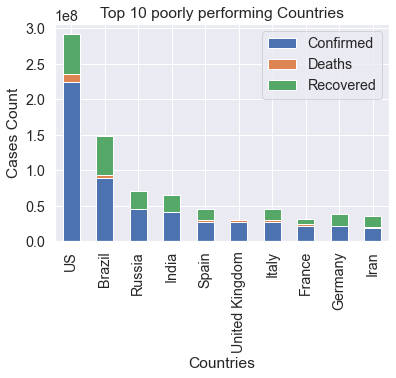

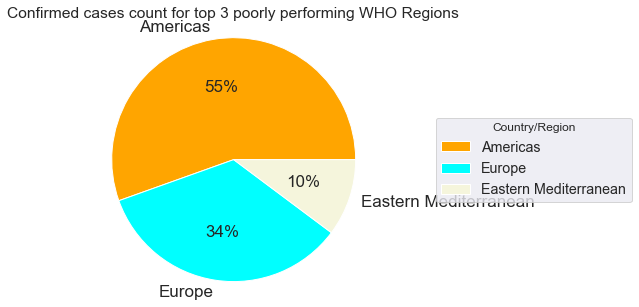

In [8]:
sns.set_style('whitegrid')
sns.set(font_scale = 1.3)
print("\n\n")
# 15 points
# Task 3-a: Plot the graph for the top 10 poorly performing countries, over 7 months of data provided 
# Think of a way to nicely visualize all the countries. 
#########################begin code for Task 3-a
scount=df_data.groupby('Country/Region')['Confirmed','Deaths','Recovered'].sum().sort_values(['Confirmed'],ascending=[False]).head(10)


scount.plot(kind='bar', stacked=True)

plt.title("Top 10 poorly performing Countries")
plt.xlabel('Countries')
plt.ylabel('Cases Count')
#########################end code for Task 3-a

# 15 points
# Task 3-b: Plot a pie-chart for the top 3 poorly performing WHO regions, over 7 months of data provided 
#########################begin code for Task 3-b 

wcount=df_data.groupby('WHO Region')['Confirmed'].sum().to_frame('Confirmed_count').reset_index().sort_values(['Confirmed_count'],ascending=[False]).head(3)
fig,a = plt.subplots(figsize =(7, 5))
a.pie(wcount['Confirmed_count'],colors=[ "orange", "cyan","beige"],textprops={'fontsize' :17},autopct='%1.0f%%',labels=wcount['WHO Region'])
a.axis('equal')
a.legend( wcount['WHO Region'], title ="Country/Region", loc ="center left", bbox_to_anchor =(1, 0, 0.5, 1)) 
plt.title('Confirmed cases count for top 3 poorly performing WHO Regions')

plt.show()


#########################end code for Task 3-b

# Task 4: Interesting Information.
Find out an 'interesting' information from the dataset. Create a visualization for it and explain in a few lines your reasoning. 

This task is worth 10 points. Your result will be judged based on the uniqueness and quality of your work (having a meaningful result and an aesthetic visualization). 

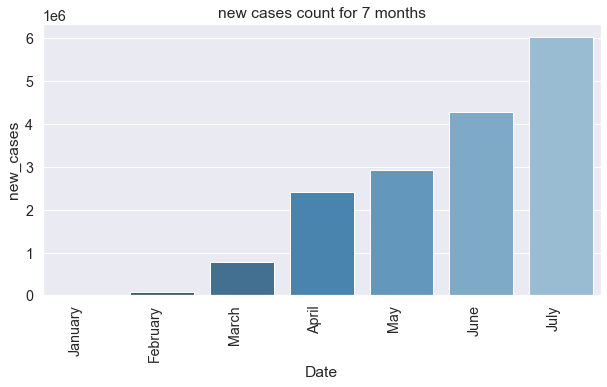

<ipython-input-9-10f740be855f>:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  scount=df_data.groupby('WHO Region')['New cases','New deaths','New recovered'].sum().sort_values(['New cases'],ascending=[False])


Text(0, 0.5, 'Cases Count')

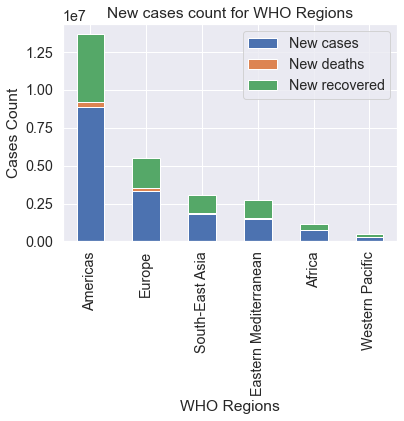

In [9]:
#########################begin code for Task 4

# The below visualization provides information regarding the number of new cases that have been 
# discovered in each month for all the countries combined.

df_data['Date'] = pd.to_datetime(df_data.Date)
res=df_data.groupby(df_data['Date'].dt.strftime('%B'))['New cases'].sum().to_frame('new_cases').reset_index().sort_values(['new_cases'],ascending=[True])
plt.subplots(figsize = (10,5))
ax = sns.barplot(x="Date", y="new_cases",data=res,palette="Blues_d").set_title('new cases count for 7 months')
plt.xticks(rotation=90,horizontalalignment='right')
plt.show()


# Another viualization provides the the new cases confirmed,deaths,recovered for the WHO regions
scount=df_data.groupby('WHO Region')['New cases','New deaths','New recovered'].sum().sort_values(['New cases'],ascending=[False])
scount.plot(kind='bar', stacked=True)
plt.title("New cases count for WHO Regions")
plt.xlabel('WHO Regions')
plt.ylabel('Cases Count')


#########################end code for Task 4

Interesting information and observation: 


Visualization 1

The graph above gives us information on the relation between the number of new cases and the months in which they occured during the seven months data provided. From the above graph we can say that the maximum number of new cases are discovered in the month of July. The lowest number of new cases are discovered in the month of January. It can also be observed that there is a steady increase in the occurence of the new cases from January to July. Overall we can conclude that the number of new cases have risen from the beginning to the mid of the year.

Visualization 2

The graph above gives us the information on the relation between the number of new cases for each WHO Region in the period of seven months.From the second visualization we can say that the maximum number of new cases discovered is in the Americas while the least cases discovered in the Western Pacific.It can be observed that even though maximum number of new cases are being discovered in the americas ,the number of recovered cases is also the highest eventually we can see only a small number of deaths being reported.It can be concluded that number of cases are appearing to rise over the period of seven months.

# Task 5: WEKA

You have to use WEKA,
* This task is worth 10 points.
* This task is different from the above tasks attached.
* You have to work on disaster.csv dataset attached in the same directory as the file.
* Find out how to convert the used dataset in weka format 
* Convert it 
* use the weka visualizer to produce some graphs.
* Write down observations, on the images you are going to attach with the submission.
* You must attach atleast 5 different observations alongwith your submission.


In this dataset, you will work on 63 years of Federal Disasters dataset. The file database.csv contains 46,184 rows and 14 columns. This dataset begins with the year 1953, and runs up to the year 2017. Each row corresponds to an emergency declared by the president due to a natural disaster all around the US. The columns of the data-set are:

* Declaration Number - Unique number for each emergency declared
* Declaration Type - Type of declaration
* Declaration Date - Date of declaration
* State - State affected
* County - County affected
* Disaster Type
* Disaster Title
* Start Date - The date event started
* End Date - The date event ended
* Close Date - End of Declaration
* Individual Assistance Program - Whether IAP was provided or not?
* Individuals & Households Program - Whether IHP was provided or not?
* Public Assistance Program - Whether PAP was provided or not?
* Hazard Mitigation Program - Whether HMP was provided or not?

In [10]:
#########################begin code for Task 5
# Goto weka tools and open disaster.csv file in arff viewer.
# If you find any problems in the dataset, you can pre-process data to avoid any such case as per your obersvations,
# and mention it here.
# and finally you can save it as arff file
# Write down observations, on the images you are going to attach with the submission.

Below provided are the images of the visualizations performed using the weka tool by converting the disaster.csv in arff viewer.Initially the dataset had too many values to visualize we had to apply different classifiers and filters to obtain observations

OBSERVATIONS


Observation 1 : The X-axis contains public assistance program(Selected Attribute) and y-axis contains Hazard mitigation program, of nominal type. It has only two values. And number of missing values are zero in this case. Among the given two labels, first one is better.

Observation 2 : The X-axis contains Disaster type(Selected Attribute) and y-axis contains Hazard mitigation program, of nominal type. It has total twenty distinct values. And number of missing values are zero in this case. Among the given labels, storm has been classified properly.

Observation 3 : The X-axis contains Declaration type(Selected Attribute) and y-axis contains Hazard mitigation program, of nominal type. It has three distinct values. And number of missing values are zero in this case. Among the given labels, disaster has been classified properly and fire has only one class.

Observation 4 : The X-axis contains Declaration Date(Selected Attribute) and y-axis contains Close Date, of nominal type. The attributes can be changed by using the bar provided. By using jitter the data about each instance can be known.
   
Observation 5 : The X-axis contains Declaration Number(Selected Attribute) and y-axis contains State, of nominal type. The attributes can be changed by using the bar provided. By using jitter the data about each instance can be known and outliers can be identified. Rectangle boxes indicate errors.
    
Observation 6 : The X-axis contains End Date(Selected Attribute) and y-axis contains State, of nominal type. The attributes can be changed by using the bar provided. Data preprocessing has been done by applying unsupervised instance - remove frequent value filter. 
                By using jitter the data about each instance can be known and outliers can be identified. Rectangle boxes indicate errors.

Included files in submission :
    
1. Observations.pdf includes the visualizations and the images for the observations above labelled respectively
2. The disaster dataset in .arff format
### For submission, the arff file has to be submitted alongwith 5 graphical observations in a folder with extensions .png, .jpg
### or can provide a compiled set of images in a word or pdf.
#########################end code for Task 5 

SyntaxError: invalid syntax (<ipython-input-10-8574a4605cac>, line 8)

Citations :


1.https://towardsdatascience.com/stacked-bar-charts-with-pythons-matplotlib-f4020e4eb4a7

2.https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/